Name - Y.H.A.Epa

Index Number - 190166V

Assignment 3

**Connected Component Analysis**

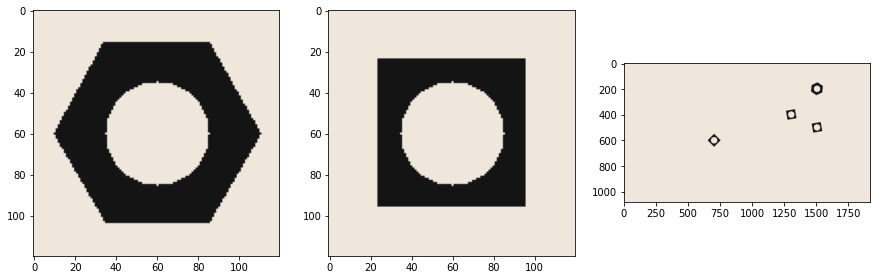

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (15, 15))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

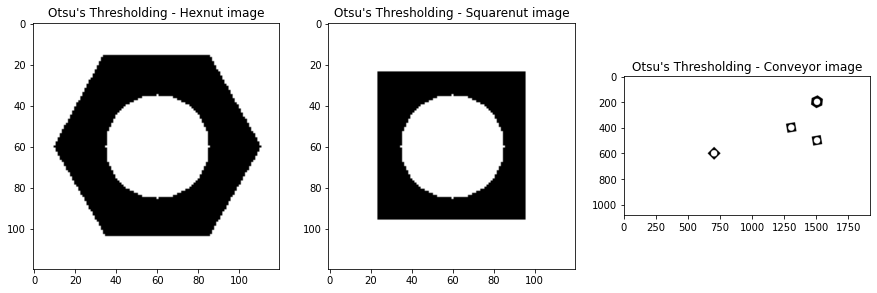

Threshold value of Hexnut image= 20.0
Threshold value of Squarenut image= 20.0
Threshold value of Conveyor image= 20.0


In [48]:
grey_hexnut = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
grey_squarenut = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
grey_conveyor = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

threshold1, output1 = cv.threshold(grey_hexnut, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
threshold2, output2 = cv.threshold(grey_squarenut, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
threshold3, output3 = cv.threshold(grey_conveyor, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

images = ["Hexnut image", "Squarenut image", "Conveyor image"]
threshold = [threshold1, threshold2, threshold3]
outputs = [output1, output2, output3]

fig, ax = plt.subplots(1, 3, figsize = (15,15))
for i in range(3):
    ax[i].imshow(outputs[i], 'gray')
    title = "Otsu's Thresholding - " + images[i]
    ax[i].set_title(title)
plt.show()

for i in range(3):
    print("Threshold value of " + images[i] + "= " + str(threshold[i]))

In [49]:
kernel = np.ones((3,3),np.uint8)
morph_closing_ims = []

for i in range(3):
    im = cv.morphologyEx(np.invert(outputs[i]), cv.MORPH_CLOSE, kernel)
    morph_closing_ims.append(im)

* Hexnut image:
     No. of connected components = 2

     Statistics :
     x coordinate of the component = 0
     y coordinate of the component = 0
     width of the component = 120
     height of the component = 120
     area of the component = 9672
     centroid of the component = [59.33684864 59.63513234]

     x coordinate of the component = 10
     y coordinate of the component = 16
     width of the component = 101
     height of the component = 88
     area of the component = 4728
     centroid of the component = [59.83375635 59.22356176]

* Squarenut image:
     No. of connected components = 2

     Statistics :
     x coordinate of the component = 0
     y coordinate of the component = 0
     width of the component = 120
     height of the component = 120
     area of the component = 11173
     centroid of the component = [59.5875772 59.5875772]

     x coordinate of the component = 24
     y coordinate of the component = 24
     width of the component = 72
     height of th

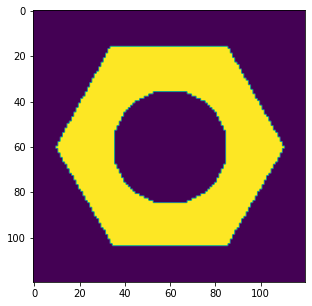

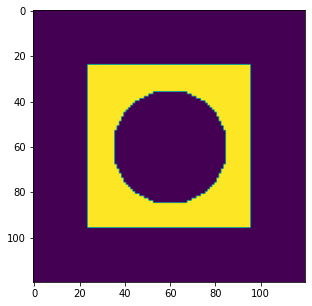

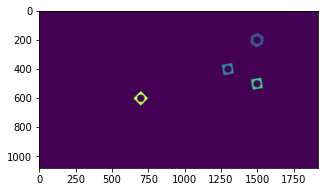

In [50]:
for i in range(3):
    numLabels, labels, stats, centroids = cv.connectedComponentsWithStats(morph_closing_ims[i])
    print("* " + images[i] + ":")
    print("     No. of connected components = " + str(numLabels) + "\n")
    print("     Statistics :")
    for j in range(numLabels):
        print("     x coordinate of the component = " + str(stats[j][0]))
        print("     y coordinate of the component = " + str(stats[j][1]))
        print("     width of the component = " + str(stats[j][2]))
        print("     height of the component = " + str(stats[j][3]))
        print("     area of the component = " + str(stats[j][4]))
        print("     centroid of the component = " + str(centroids[j]) + "\n")
    fig, ax = plt.subplots(1,1, figsize = (5,5))
    plt.imshow(labels)

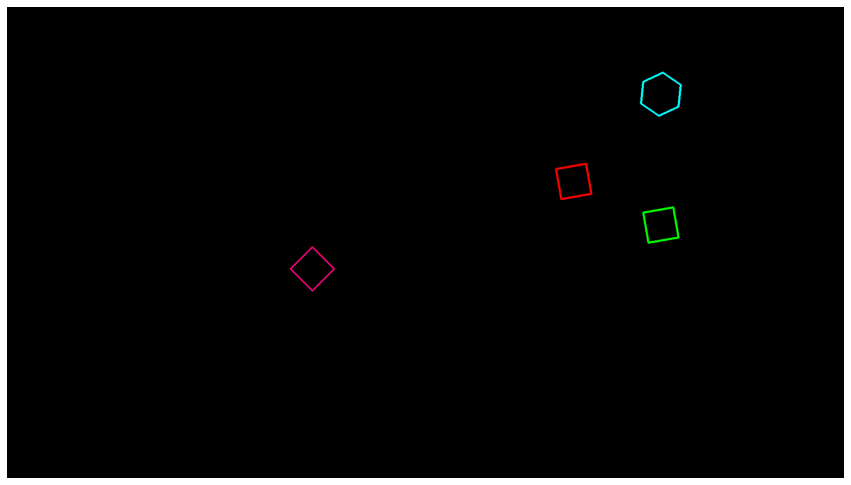

In [51]:
contours, hierarchy = cv.findContours(morph_closing_ims[2], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img = np.zeros((conveyor_f100.shape[0], conveyor_f100.shape[1], 3), np.uint8)

cv.drawContours(img, contours, 0, (127,0,255), 4) #pink
cv.drawContours(img, contours, 1, (0,255,0), 4) #green
cv.drawContours(img, contours, 2, (0,0,255), 4) #red
cv.drawContours(img, contours, 3, (255,255,0), 4) #blue

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

**Detecting Objects on a Synthetic Conveyor**

In [52]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [53]:
contours1, hierarchy1 = cv.findContours(morph_closing_ims[0], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv.findContours(morph_closing_ims[1], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt2 = contours2[0]
cnt1 = contours1[0]

matches = 0 

for i in range(4):
    cnt3 = contours[i]
    ret = cv.matchShapes(cnt1, cnt3, cv.CONTOURS_MATCH_I1, 0.0)
    if ret < 0.001:
        matches += 1
print("No. of matching hexagonal nuts =", matches)    

No. of matching hexagonal nuts = 1


In [54]:
# Your code here.
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []  

contours2, hierarchy2 = cv.findContours(morph_closing_ims[1], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt2 = contours2[0]

total_squares = 0
total_hexnuts = 0
current_hexnuts = 0
current_squares = 0
frame_array = []
text_array = []

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    grey_frame = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    threshold_frame, output_frame = cv.threshold(grey_frame, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    output_frame = cv.morphologyEx(np.invert(output_frame), cv.MORPH_CLOSE, kernel)
    contours_frame, hierarchy_frame = cv.findContours(output_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    pre_hexnuts = current_hexnuts
    pre_squarenuts = current_squares
    current_hexnuts = 0
    current_squares = 0
    for i in range(len(contours_frame)):
        cnt3 = contours_frame[i]

        ret = cv.matchShapes(cnt1, cnt3, cv.CONTOURS_MATCH_I1, 0.0)
        ret1 = cv.matchShapes(cnt2, cnt3, cv.CONTOURS_MATCH_I1, 0.0)

        if ret < 0.001:
            current_hexnuts += 1
        if ret1 < 0.001:
            current_squares += 1

    if pre_hexnuts < current_hexnuts:
        total_hexnuts +=1
    if pre_squarenuts < current_squares:
        total_squares +=1
    
    f += 1
    text = 'Frame:' + str(f)

    text1 = 'Frame:' + str(f)
    text2 = "Current hexnut count :" + str(current_hexnuts)
    text3 = "Current squarenut count :" + str(current_squares)
    text4 = "Total hexnut count :" + str(total_hexnuts)
    text5 = "Total squarenut count :" + str(total_squares)

    texts = [text1, text2, text3, text4, text5]
    text_array.append(texts)
    
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    frame_array.append(frame)
    
    if cv.waitKey(1) == ord('q'):  
        break
    
# Writing the video
shape = (1080, 1920, 3)

# Your code here
for i in range(len(frame_array)):
    for j in range(5):
        cv.putText(frame_array[i],text_array[i][j] , (100, 100 + 25*j), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)

out = cv.VideoWriter('./conveyor_result_190166V.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
